In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_columns',None)
pd.options.mode.chained_assignment = None

In [2]:
df=pd.read_csv(r"/content/Fraud Analytics Dataset - npci_data.csv.csv")

In [3]:
df.head()

,txn_id,dt_txn_comp,txn_comp_time,txn_type,txn_subtype,initiating_channel_id,txn_status,error_code,payer_psp,payee_psp,remitter_bank,beneficiary_bank,payer_handle,payer_app,payee_handle,payee_app,payee_requested_amount,payee_settlement_amount,payer_location,payer_city,payer_state,payee_location,payee_city,payee_state,payer_os_type,payee_os_type,beneficiary_mcc_code,remitter_mcc_code,custref_transaction_ref,cred_type,cred_subtype,payer_app_id,payee_app_id,initiation_mode,dt_time_txn_compl,time_of_day
0,436,2023-08-11,12:00:00 AM,Refund,Product Refund,4,Successful,NaN,Amazon Pay,BharatPe (for UPI and QR code payments),Allahabad Bank,Karur Vysya Bank,SCB,Standard Chartered UPI,KOTAK,BHIM KOTAK Pay,54020,54020,151001,Bathinda,Punjab,431601,Nanded,Maharashtra,Others,iOS,7277,6051,Reference 324,Debit Card,Prepaid Debit Card,BHIM Union Bank UPI App,AmazonPay,18,2023-08-11 0:00,Night
1,665,2021-10-17,12:00:00 AM,Payment,Peer-to-Peer (P2P),16,Successful,NaN,ICICI iMobile,Square (for international transactions),Madhya Bihar Gramin Bank,Kotak Mahindra Bank,WASBI,WhatsApp Pay,HDFCBANKJD,JustDial,37670,37670,208001,Kanpur,Uttar Pradesh,302001,Jaipur,Rajasthan,MacOS,Windows,7012,5966,Reference 550,Overdraft,Business Overdraft,ESAF,BHIM Union Bank UPI App,18,2021-10-17 0:00,Night
2,726,2019-11-16,12:00:00 AM,Withdrawal,ATM Withdrawal,3,Successful,NaN,Axis Pay,PhonePe for Merchants,Karur Vysya Bank,United Bank of India,KMBL,Khalijeb,UTKARSHBANK,UTKARSHBANK,22984,22984,125001,Hisar,Haryana,151001,Bathinda,Punjab,Android,Windows,1799,5047,Reference 611,Auto Loan,Used Car Loan,ICICI iMobile,BHIM Indus Pay,16,2019-11-16 0:00,Night
3,842,2023-09-05,12:00:00 AM,Transfer,Inter-bank Transfer,0,Successful,NaN,MobiKwik,ICICI Merchant Services,HDFC Bank,Corporation Bank,IDBI,BHIM PAyWIZ by IDBI Bank,WASBI,WhatsApp Pay,62038,62038,151001,Bathinda,Punjab,403401,Ponda,Goa,Android,Windows,8641,822,Reference 729,Overdraft,Personal Overdraft,BHIM UPI APP,JusPay Technologies,2,2023-09-05 0:00,Night
4,2202,2021-09-18,12:00:00 AM,Fee,Account Maintenance Fee,1,Successful,NaN,MasterCard,BharatPe (for UPI and QR code payments),Union Bank of India,Bank of India,UNIONBANK,BHIM Union Bank UPI App,NSDL,NSDL,72624,72624,768001,Sambalpur,Odisha,431601,Nanded,Maharashtra,Others,Windows,4225,5978,Reference 2068,Personal Loan,Unsecured Personal Loan,PREPAIDICICI,Cred,1,2021-09-18 0:00,Night


In [4]:
len(df)

55671

In [5]:
df.columns

Index(['txn_id', 'dt_txn_comp', 'txn_comp_time', 'txn_type', 'txn_subtype',
       'initiating_channel_id', 'txn_status', 'error_code', 'payer_psp',
       'payee_psp', 'remitter_bank', 'beneficiary_bank', 'payer_handle',
       'payer_app', 'payee_handle', 'payee_app', 'payee_requested_amount',
       'payee_settlement_amount', 'payer_location', 'payer_city',
       'payer_state', 'payee_location', 'payee_city', 'payee_state',
       'payer_os_type', 'payee_os_type', 'beneficiary_mcc_code',
       'remitter_mcc_code', 'custref_transaction_ref', 'cred_type',
       'cred_subtype', 'payer_app_id', 'payee_app_id', 'initiation_mode',
       'dt_time_txn_compl', 'time_of_day'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55671 entries, 0 to 55670
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   txn_id                   55671 non-null  int64 
 1   dt_txn_comp              55671 non-null  object
 2   txn_comp_time            55671 non-null  object
 3   txn_type                 55671 non-null  object
 4   txn_subtype              55671 non-null  object
 5   initiating_channel_id    55671 non-null  int64 
 6   txn_status               55671 non-null  object
 7   error_code               4903 non-null   object
 8   payer_psp                55671 non-null  object
 9   payee_psp                55671 non-null  object
 10  remitter_bank            55671 non-null  object
 11  beneficiary_bank         55671 non-null  object
 12  payer_handle             55671 non-null  object
 13  payer_app                55671 non-null  object
 14  payee_handle             55671 non-nul

In [7]:
df.isna().sum()

,0
txn_id,0
dt_txn_comp,0
txn_comp_time,0
txn_type,0
txn_subtype,0
initiating_channel_id,0
txn_status,0
error_code,50768
payer_psp,0
payee_psp,0


In [8]:
df["error_code"].value_counts()

,count
error_code,
U26,211
U53,195
U78,194
U03,174
U92,172
U28,172
U68,170
U14,168
U09,166


In [9]:
df.drop(["dt_txn_comp", "txn_comp_time"], axis=1, inplace=True)

In [10]:
df['dt_time_txn_compl']

,dt_time_txn_compl
0,2023-08-11 0:00
1,2021-10-17 0:00
2,2019-11-16 0:00
3,2023-09-05 0:00
4,2021-09-18 0:00
...,...
55666,2021-01-01 22:58
55667,2020-05-04 22:58
55668,2022-01-24 22:58
55669,2022-06-18 22:58


In [11]:
df['dt_time_txn_compl'] = pd.to_datetime(df['dt_time_txn_compl'])

In [12]:
df['dt_time_txn_compl'].dtype

dtype('<M8[ns]')

In [13]:
error_code_mapping = {
    'U26': 'Transaction denied due to network issues',
    'U53': 'Transaction declined based on risk score',
    'U78': 'Exceeded daily transaction limit',
    'U03': 'Authentication failed - suspected fraud',
    'U92': 'Transaction not supported by the bank',
    'U28': 'Account frozen due to suspected fraudulent activity',
    'U68': 'Invalid payment details - possible fraud attempt',
    'U14': 'Transaction timed out - security check triggered',
    'U09': 'Server error, try again later',
    'U31': 'Duplicate transaction request detected',
    'U30': 'Incorrect payment credentials - suspected fraud',
    'U54': 'Account inactive or dormant',
    'U67': 'Technical error, please retry',
    'U91': 'Transaction flagged for review due to risk',
    'U16': 'Insufficient balance',
    'U18': 'Invalid transaction request type',
    'U69': 'Unusual activity detected - flagged for fraud',
    'U85': 'Currency mismatch during transaction',
    'U19': 'Amount exceeds allowable transaction limit',
    'U17': 'Invalid transaction reference ID',
    'U90': 'Service currently unavailable',
    'U96': 'Transaction could not be processed',
    'U29': 'Beneficiary account not found',
    'U94': 'Transaction reversed',
    'U93': 'Incorrect details provided for the transaction',
    'U66': 'Authorization error from payer’s bank',
    'U80': 'Transaction failed due to unknown reasons',
    'M16': 'Merchant account-related issue',
    'U88': 'Transaction is still pending',
    'U89': 'Transaction was canceled by the user',
    'U86': 'Unknown system error occurred - possible risk flag'
}

In [14]:
len(df)

55671

In [15]:
df['error_description'] = df['error_code'].map(error_code_mapping)

In [16]:
df_with_errors = df.dropna(subset=['error_code'])

In [17]:
len(df_with_errors)

4903

In [18]:
df_with_errors[["txn_status","error_code","error_description"]].head(20)

,txn_status,error_code,error_description
180,Reversed,U94,Transaction reversed
183,Refunded,U14,Transaction timed out - security check triggered
211,Reversed,U94,Transaction reversed
214,Refunded,U14,Transaction timed out - security check triggered
238,Reversed,U94,Transaction reversed
241,Refunded,U14,Transaction timed out - security check triggered
256,Reversed,U69,Unusual activity detected - flagged for fraud
271,Reversed,U69,Unusual activity detected - flagged for fraud
303,Reversed,U69,Unusual activity detected - flagged for fraud
332,On Hold,U93,Incorrect details provided for the transaction


U53: "Transaction declined based on risk score" highlights risk-based declines.
U03, U28, U68, U30, U91, U69: Include suspected fraud mentions or risk-related triggers.
U14: Reflects timeouts caused by security checks, possibly indicating risk or fraud detection.


In [19]:
df["txn_status"].value_counts()

,count
txn_status,
Successful,50768
Failed,1108
Refunded,812
On Hold,716
Reversed,697
Pending,680
Cancelled,679
Error,211


In [20]:
df_with_errors.groupby(["txn_status","error_code"])["error_code"].count()

txn_status  error_code
Cancelled   M16           24
            U03           36
            U09           18
            U14           30
            U16           12
                          ..
Reversed    U91           36
            U92           24
            U93           30
            U94           30
            U96           10
Name: error_code, Length: 217, dtype: int64

In [21]:
fraud_error_codes = ['U53', 'U03', 'U28', 'U68', 'U30', 'U91', 'U69', 'U14']

In [22]:
df_fraud = df_with_errors[df_with_errors['error_code'].isin(fraud_error_codes)]

In [23]:
len(df_fraud)

1357

In [24]:
df_fraud.head()

,txn_id,txn_type,txn_subtype,initiating_channel_id,txn_status,error_code,payer_psp,payee_psp,remitter_bank,beneficiary_bank,payer_handle,payer_app,payee_handle,payee_app,payee_requested_amount,payee_settlement_amount,payer_location,payer_city,payer_state,payee_location,payee_city,payee_state,payer_os_type,payee_os_type,beneficiary_mcc_code,remitter_mcc_code,custref_transaction_ref,cred_type,cred_subtype,payer_app_id,payee_app_id,initiation_mode,dt_time_txn_compl,time_of_day,error_description
183,11598,Fee,Account Maintenance Fee,18,Refunded,U14,HDFC Bank NetBanking,ICICI Merchant Services,Punjab and Maharashtra Co-operative Bank (PMC),Bank of India,AUBANK,BHIM AUPay(AU Small Finance Bank),BANDHAN,Bandhan Bank UPI,26790,26790,560001,Bangalore,Karnataka,753001,Cuttack,Odisha,iOS,MacOS,820,1731,Reference 11325,Line of Credit,HELOC (Home Equity Line of Credit),Samsung Pay,APMAHESH,4,2019-09-03 00:04:00,Night,Transaction timed out - security check triggered
214,30466,Fee,Account Maintenance Fee,18,Refunded,U14,HDFC Bank NetBanking,ICICI Merchant Services,Punjab and Maharashtra Co-operative Bank (PMC),Bank of India,AUBANK,BHIM AUPay(AU Small Finance Bank),BANDHAN,Bandhan Bank UPI,26790,26790,560001,Bangalore,Karnataka,753001,Cuttack,Odisha,iOS,MacOS,820,1731,Reference 11325,Line of Credit,HELOC (Home Equity Line of Credit),Samsung Pay,APMAHESH,4,2019-09-03 00:04:00,Night,Transaction timed out - security check triggered
241,48437,Fee,Account Maintenance Fee,18,Refunded,U14,HDFC Bank NetBanking,ICICI Merchant Services,Punjab and Maharashtra Co-operative Bank (PMC),Bank of India,AUBANK,BHIM AUPay(AU Small Finance Bank),BANDHAN,Bandhan Bank UPI,26790,26790,560001,Bangalore,Karnataka,753001,Cuttack,Odisha,iOS,MacOS,820,1731,Reference 11325,Line of Credit,HELOC (Home Equity Line of Credit),Samsung Pay,APMAHESH,4,2019-09-03 00:04:00,Night,Transaction timed out - security check triggered
256,3912,Refund,Product Refund,14,Reversed,U69,HDFC Bank NetBanking,Square (for international transactions),Canara Bank,Corporation Bank,YAPL,AmazonPay,OKAXIS,Google Pay,84576,84576,688001,Alappuzha,Kerala,151001,Bathinda,Punjab,MacOS,Others,3719,7278,Reference 3754,Auto Loan,New Car Loan,Jupiter Axis,BHIM PAyWIZ by IDBI Bank,5,2021-06-12 00:06:00,Night,Unusual activity detected - flagged for fraud
271,16916,Refund,Product Refund,14,Reversed,U69,HDFC Bank NetBanking,Square (for international transactions),Canara Bank,Corporation Bank,YAPL,AmazonPay,OKAXIS,Google Pay,84576,84576,688001,Alappuzha,Kerala,151001,Bathinda,Punjab,MacOS,Others,3719,7278,Reference 3754,Auto Loan,New Car Loan,Jupiter Axis,BHIM PAyWIZ by IDBI Bank,5,2021-06-12 00:06:00,Night,Unusual activity detected - flagged for fraud


In [25]:
import kaleido
import plotly.express as px

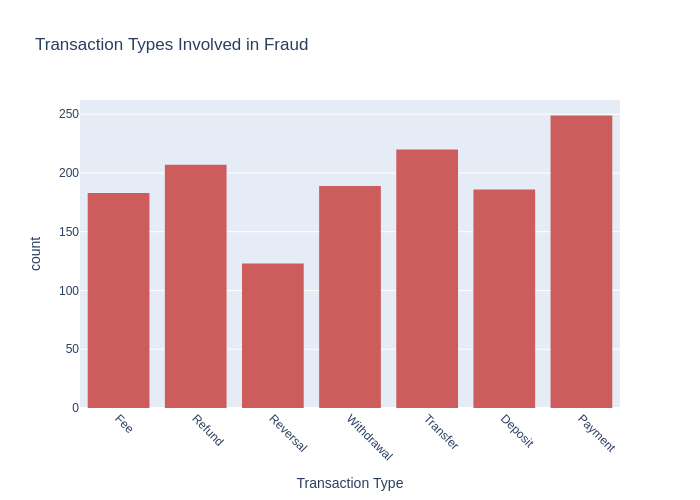

In [28]:
fig1 = px.histogram(df_fraud, x='txn_type', title="Transaction Types Involved in Fraud",
                    labels={'txn_type': 'Transaction Type'},
                    color_discrete_sequence=['indianred'])
fig1.update_xaxes(tickangle=45)

fig1.show("png")

**Transaction Types Involved in Fraud (Bar Chart)**:


*   This chart categorizes various types of transactions based on their involvement in fraud.
*   The most common transaction type associated with fraud is Payment, followed by Refund, Transfer, and Withdrawal.
*   Reversal has the lowest count of fraud-related transactions compared to the other types.

In [ ]:
fig2 = px.bar(df_fraud['error_code'].value_counts(),
              title='Error Codes Involved in Fraud',
              labels={'index': 'Error Code', 'value': 'Count'},
              color_discrete_sequence=['darkcyan'])
fig2.show("png")


**Error Codes Involved in Fraud**:
This chart lists error codes frequently associated with fraudulent activities.
U53 is the most common error code in fraud cases, followed by U03, U28, and U68.

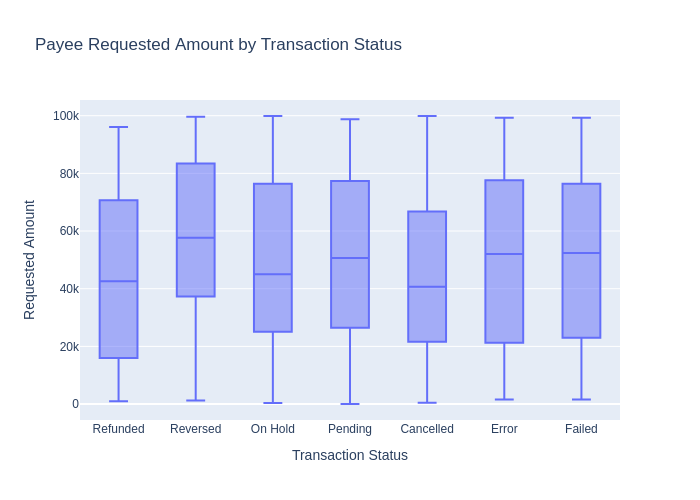

In [29]:
fig3 = px.box(df_fraud, x='txn_status', y='payee_requested_amount',
              title="Payee Requested Amount by Transaction Status",
              labels={'txn_status': 'Transaction Status', 'payee_requested_amount': 'Requested Amount'})
fig3.show("png")

The boxplot shows the distribution of requested amounts for different transaction statuses.


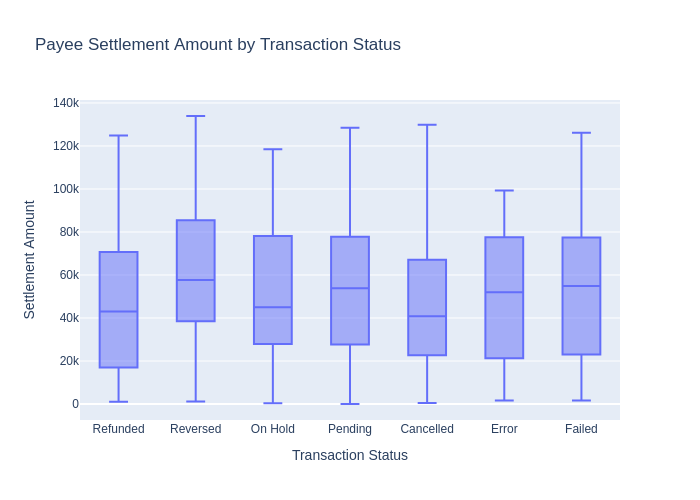

In [32]:
fig4 = px.box(df_fraud, x='txn_status', y='payee_settlement_amount',
              title="Payee Settlement Amount by Transaction Status",
              labels={'txn_status': 'Transaction Status', 'payee_settlement_amount': 'Settlement Amount'})
fig4.show("png")

The boxplot shows the distribution of settlement amounts for different transaction statuses. The median settlement amount for refunded transactions is around 40k, while for failed transactions it's around 60k.


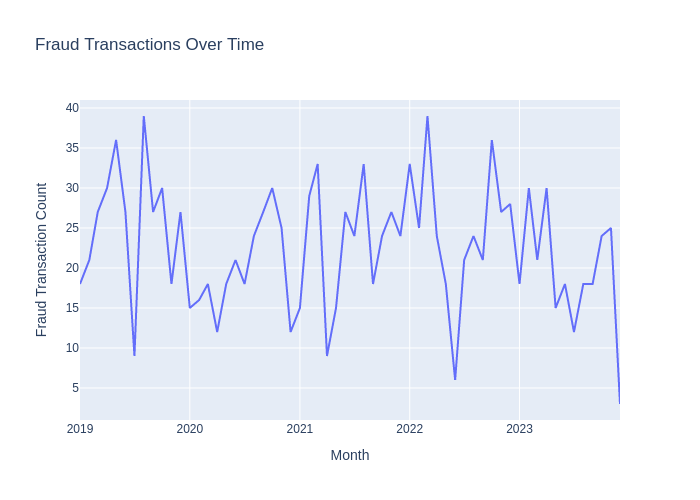

In [33]:
df_fraud['month'] = df_fraud['dt_time_txn_compl'].dt.to_period('M').astype(str)
fig5 = px.line(df_fraud.groupby('month').size().reset_index(name='count'),
               x='month', y='count', title="Fraud Transactions Over Time",
               labels={'month': 'Month', 'count': 'Fraud Transaction Count'})
fig5.show("png")

The line chart shows the trend of fraud transaction count over time, spanning from 2019 to 2023. The x-axis represents the months, while the y-axis represents the count of fraudulent transactions.The chart indicates a fluctuating trend in the number of fraud transactions over the years.

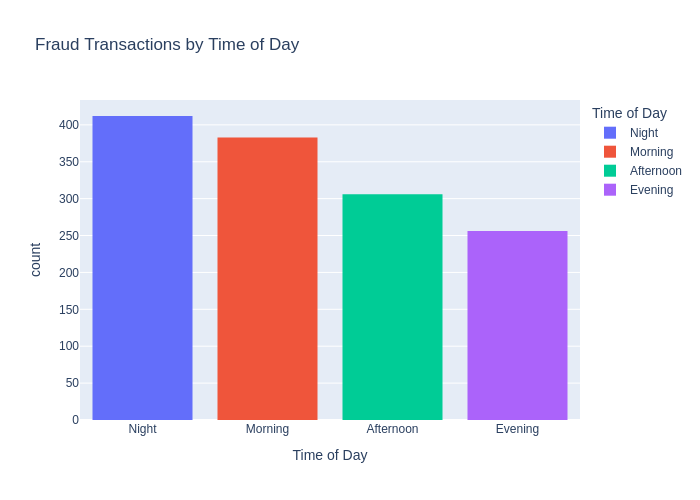

In [34]:
fig6 = px.histogram(df_fraud, x='time_of_day', title="Fraud Transactions by Time of Day",
                    labels={'time_of_day': 'Time of Day'},
                     color='time_of_day',
                    color_discrete_sequence=px.colors.qualitative.Plotly)
fig6.show("png")

The bar chart indicates that the highest number of fraud transactions occur during the night, followed by the morning. The afternoon and evening have relatively lower counts of fraud transactions.

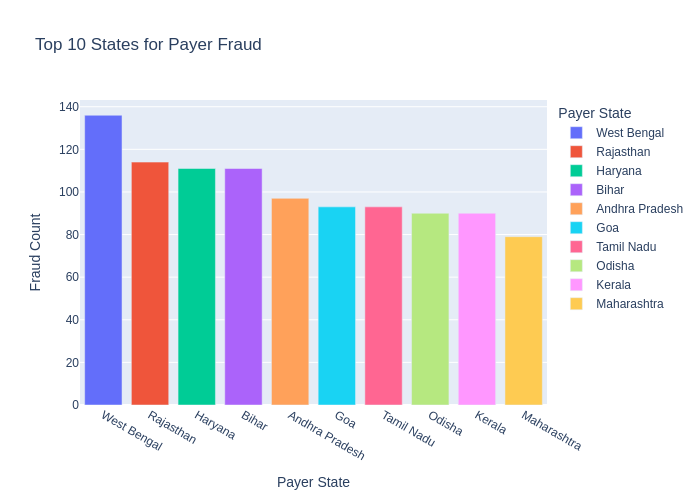

In [35]:
top_10_payer_states = df_fraud.groupby('payer_state').size().sort_values(ascending=False).head(10).reset_index(name='count')
fig7 = px.bar(top_10_payer_states, x='payer_state', y='count', title="Top 10 States for Payer Fraud",
              labels={'payer_state': 'Payer State', 'count': 'Fraud Count'},
               color='payer_state',
              color_discrete_sequence=px.colors.qualitative.Plotly)
fig7.show("png")

The chart indicates that West Bengal has the highest number of fraud transactions, followed by Rajasthan and Haryana. Other states with significant fraud counts include Bihar, Andhra Pradesh, and Goa. Tamil Nadu, Odisha, Kerala, and Maharashtra have relatively lower fraud counts.

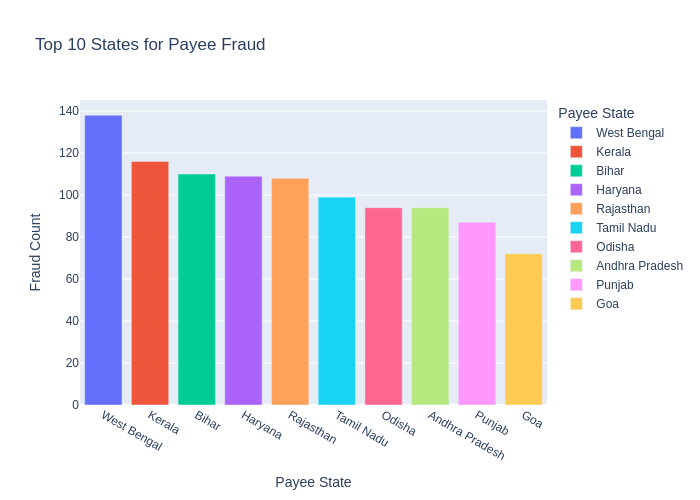

In [36]:
top_10_payee_states = df_fraud.groupby('payee_state').size().sort_values(ascending=False).head(10).reset_index(name='count')
fig8 = px.bar(top_10_payee_states, x='payee_state', y='count', title="Top 10 States for Payee Fraud",
              labels={'payee_state': 'Payee State', 'count': 'Fraud Count'},
              color='payee_state',
              color_discrete_sequence=px.colors.qualitative.Plotly)
fig8.show("png")

The chart indicates that West Bengal has the highest number of fraud transactions, followed by Rajasthan and Haryana. Other states with significant fraud counts include Bihar, Andhra Pradesh, and Goa. Tamil Nadu, Odisha, Kerala, and Maharashtra have relatively lower fraud counts.

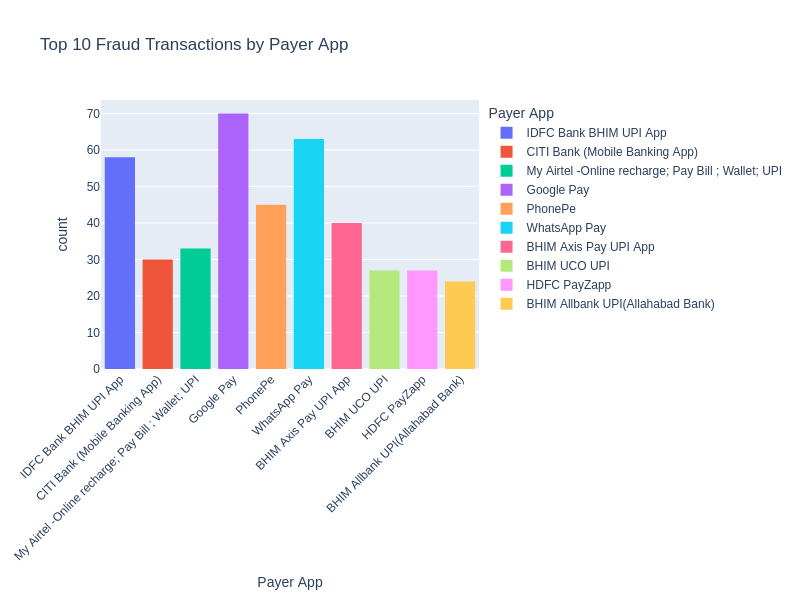

In [37]:
top_10_payer_apps = df_fraud['payer_app'].value_counts().nlargest(10).index
df_top_payer_apps = df_fraud[df_fraud['payer_app'].isin(top_10_payer_apps)]
fig9 = px.histogram(df_top_payer_apps,
                    x='payer_app',
                    title="Top 10 Fraud Transactions by Payer App",
                    labels={'payer_app': 'Payer App'},
                    color='payer_app',
                    color_discrete_sequence=px.colors.qualitative.Plotly
                    )
fig9.update_layout(xaxis_tickangle=-45, width=800, height=600)

fig9.show("png")

The chart indicates that IDFC Bank BHIM UPI App and CITI Bank (Mobile Banking App) have the highest number of fraud transactions, followed by My Airtel-Online recharge; Pay Bill; Wallet; UPI. Other apps with significant fraud counts include Google Pay, PhonePe, and WhatsApp Pay. BHIM Axis Pay UPI App, BHIM UCO UPI, HDFC PayZapp, and BHIM Allbank UPI(Allahabad Bank) have relatively lower fraud counts.

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_fraud['beneficiary_mcc_code_encoded'] = le.fit_transform(df_fraud['beneficiary_mcc_code'])
df_fraud['remitter_mcc_code_encoded'] = le.fit_transform(df_fraud['remitter_mcc_code'])

In [46]:
df_fraud['payer_app_id_encoded'] = le.fit_transform(df_fraud['payer_app'].astype(str))
df_fraud['payee_app_id_encoded'] = le.fit_transform(df_fraud['payee_app'].astype(str))
columns_for_corr = ['payee_requested_amount', 'payee_settlement_amount',
                    'payer_app_id_encoded', 'payee_app_id_encoded',
                    'beneficiary_mcc_code_encoded', 'remitter_mcc_code_encoded']

# Compute the correlation matrix
corr_matrix = df_fraud[columns_for_corr].corr()

In [ ]:
fig10 = px.imshow(corr_matrix, text_auto=True, title="Correlation Heatmap for Fraud Data")
fig10.show("png")


*   **High positive correlation:**
payee_requested_amount and payee_settlement_amount have a very strong positive correlation (0.97), indicating that they are highly correlated. This is expected as the settlement amount is typically very close to the requested amount.


*  **Low correlation:**The variables payer_app_id_encoded, payee_app_id_encoded, beneficiary_mcc_code_encoded, and remitter_mcc_code_encoded have relatively low correlations with each other and with the other variables, suggesting that they may not have strong relationships with fraudulent activity.

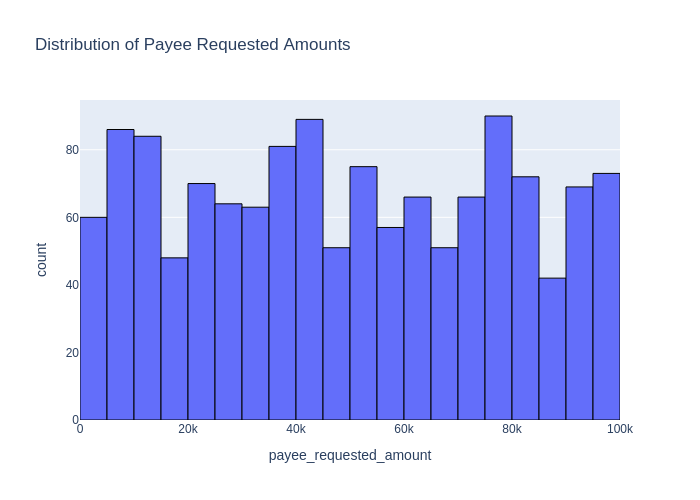

In [40]:
fig12 = px.histogram(df_fraud, x='payee_requested_amount', nbins=30, title='Distribution of Payee Requested Amounts')
fig12.update_traces(marker=dict(line=dict(width=1, color='black')))  # Add borders
fig12.show("png")

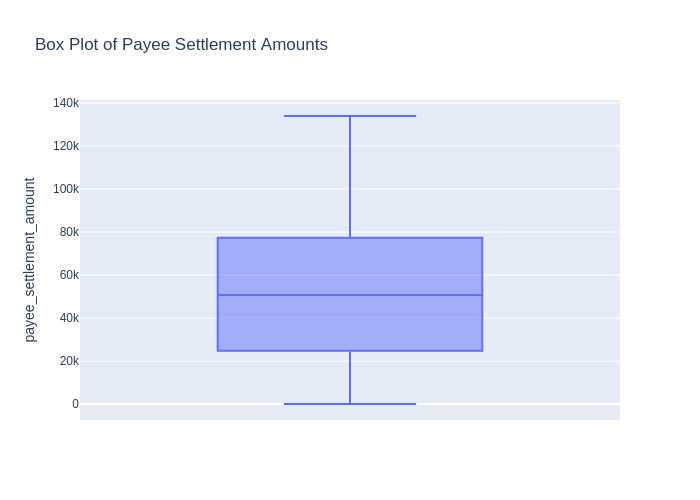

In [41]:
fig13 = px.box(df_fraud, y='payee_settlement_amount', title='Box Plot of Payee Settlement Amounts')
fig13.show("png")

The box plot shows the distribution of payee settlement amounts. The median settlement amount is around 60k. The interquartile range (IQR) is from 40k to 80k, indicating that the middle 50% of settlement amounts fall within this range


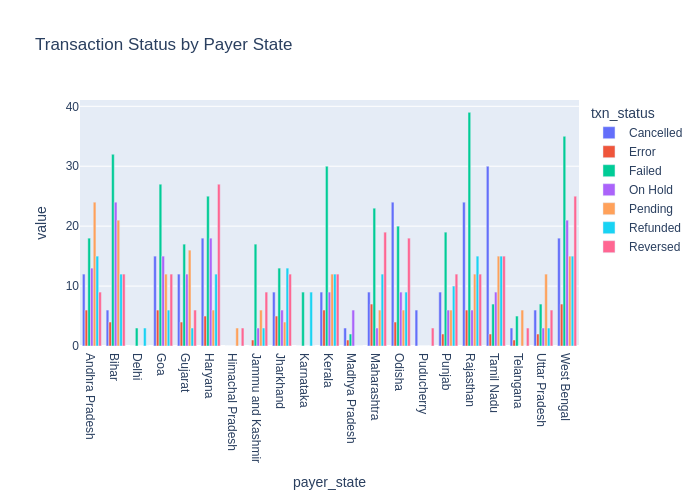

In [42]:
fig14 = px.bar(df_fraud.groupby('payer_state')['txn_status'].value_counts().unstack().fillna(0),
                title='Transaction Status by Payer State', barmode='group')
fig14.show("png")

This bar chart displays the distribution of transaction statuses for different payer states, showing how many transactions were successful or failed in each state.

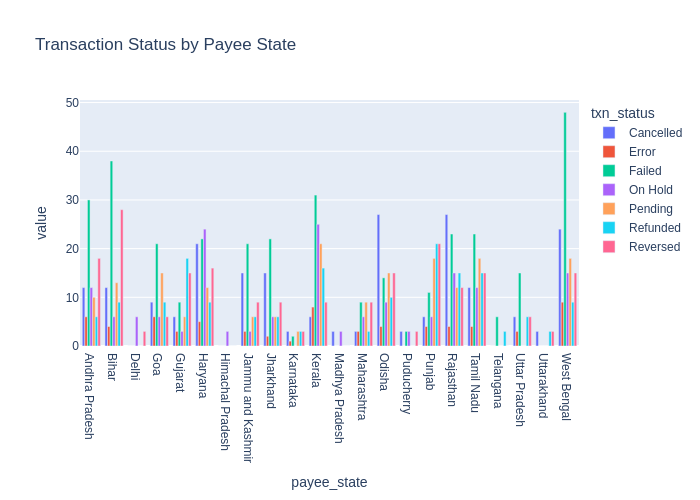

In [43]:
fig15 = px.bar(df_fraud.groupby('payee_state')['txn_status'].value_counts().unstack().fillna(0),
                title='Transaction Status by Payee State', barmode='group')
fig15.show("png")

This chart illustrates the transaction statuses for various payee states, indicating the number of successful and failed transactions.

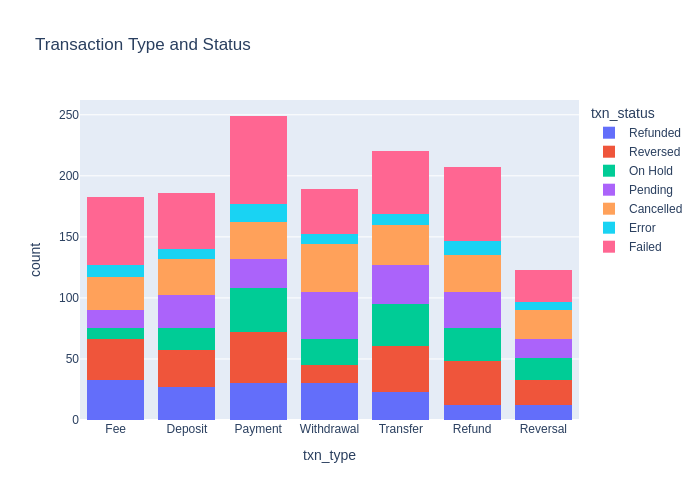

In [44]:
fig16 = px.histogram(df_fraud, x='txn_type', color='txn_status', title='Transaction Type and Status',
                     barmode='stack')
fig16.show("png")

[View Figure 1](figure13.html)

The chart shows the distribution of transaction statuses for different transaction types. The x-axis represents the various transaction types (Fee, Deposit, Payment, Withdrawal, Transfer, Refund, Reversal), while the y-axis represents the count of transactions for each status.